import the datasets.

train_essays.csv: The training set with essays written by students and a few examples of LLM-generated essays.

test_essays.csv: The test set with essays for which we need to predict whether they were generated by an LLM.

train_prompts.csv: The prompts used to generate the essays, containing both the instructions and source texts.
Our first step is to load these files and get an intuitive feel for their content.


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
train_essays_path = 'train_essays.csv'
test_essays_path = 'test_essays.csv'
train_prompts_path = 'train_prompts.csv'

# Load the data
train_essays_df = pd.read_csv(train_essays_path)
test_essays_df = pd.read_csv(test_essays_path)
train_prompts_df = pd.read_csv(train_prompts_path)

inspect the top rows of each, the info for each, and check for duplicates

In [12]:
train_essays_df.head()

,id,prompt_id,text,generated,essay_length
0,0059830c,0,Cars. Cars have been around since they became ...,0,3289
1,005db917,0,Transportation is a large necessity in most co...,0,2738
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,4428
3,00940276,0,How often do you ride in a car? Do you drive a...,0,4013
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,4698


In [16]:
train_essays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1378 non-null   object
 1   prompt_id     1378 non-null   int64 
 2   text          1378 non-null   object
 3   generated     1378 non-null   int64 
 4   essay_length  1378 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 54.0+ KB


In [53]:
train_essays_df.duplicated().sum()

0

In [13]:
# Display the few rows of the test essays
test_essays_df.head()

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [51]:
test_essays_df.duplicated().sum()

0

In [17]:
test_essays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      object
 1   prompt_id  3 non-null      int64 
 2   text       3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [18]:
# Display the few rows of the train_prompts
train_prompts_df.head()

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [42]:
train_prompts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 196.0+ bytes


In [52]:
train_prompts_df.duplicated().sum()

0

In [43]:
# Check for missing values in the datasets
missing_values_train = train_essays_df.isnull().sum()
print("missing_values_train:", missing_values_train)
missing_values_test = test_essays_df.isnull().sum()
print("\nmissing_values_train:", missing_values_train)
missing_values_prompts = train_prompts_df.isnull().sum()
print("\nmissing_values_prompts:", missing_values_prompts)


missing_values_train: id                   0
prompt_id            0
text                 0
generated            0
essay_length         0
word_count           0
unique_word_count    0
sentence_count       0
avg_word_length      0
numerals             0
number_words         0
dtype: int64

missing_values_train: id                   0
prompt_id            0
text                 0
generated            0
essay_length         0
word_count           0
unique_word_count    0
sentence_count       0
avg_word_length      0
numerals             0
number_words         0
dtype: int64

missing_values_prompts: prompt_id       0
prompt_name     0
instructions    0
source_text     0
dtype: int64


In [20]:
# Distribution of the 'generated' column
train_essays_df['generated'].value_counts()

generated
0    1375
1       3
Name: count, dtype: int64

In [21]:
llm_generated_counts = train_essays_df[train_essays_df['generated'] == 1]['prompt_id'].value_counts()
llm_generated_counts

prompt_id
1    2
0    1
Name: count, dtype: int64

Calculate the length of each essay and create a new column

/Users/catherineliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/catherineliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


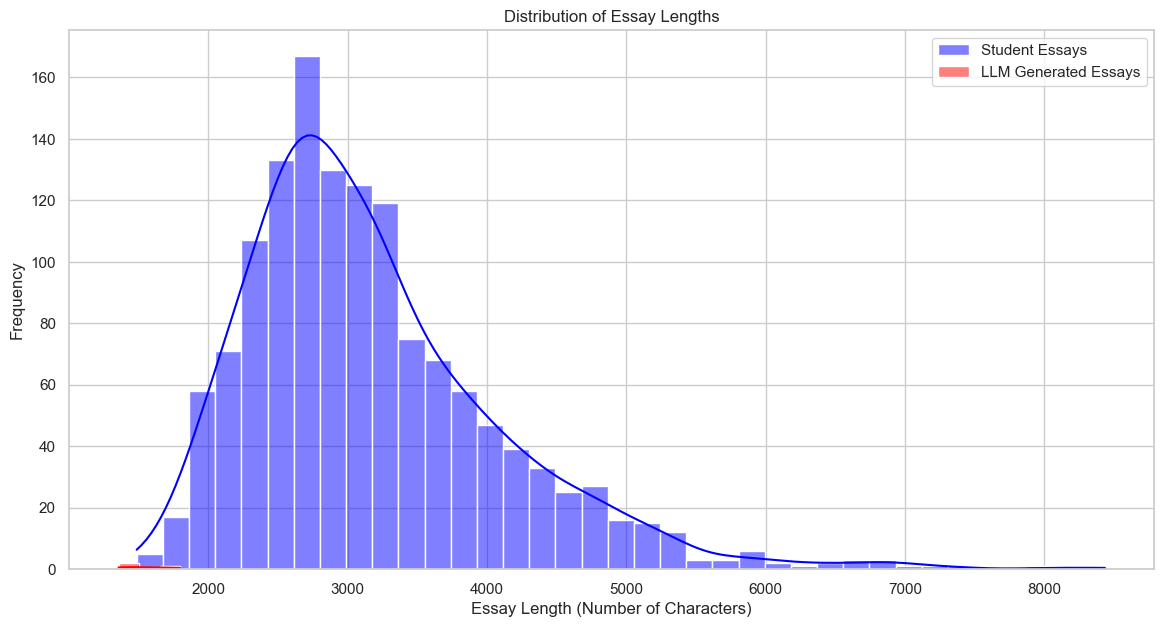

In [25]:
train_essays_df['essay_length'] = train_essays_df['text'].apply(len)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Distribution of essay lengths for student essays
sns.histplot(train_essays_df[train_essays_df['generated'] == 0]['essay_length'], color="blue", label='Student Essays', kde=True)

# Distribution of essay lengths for LLM generated essays
sns.histplot(train_essays_df[train_essays_df['generated'] == 1]['essay_length'], color="red", label='LLM Generated Essays', kde=True)

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Compare essay length by source

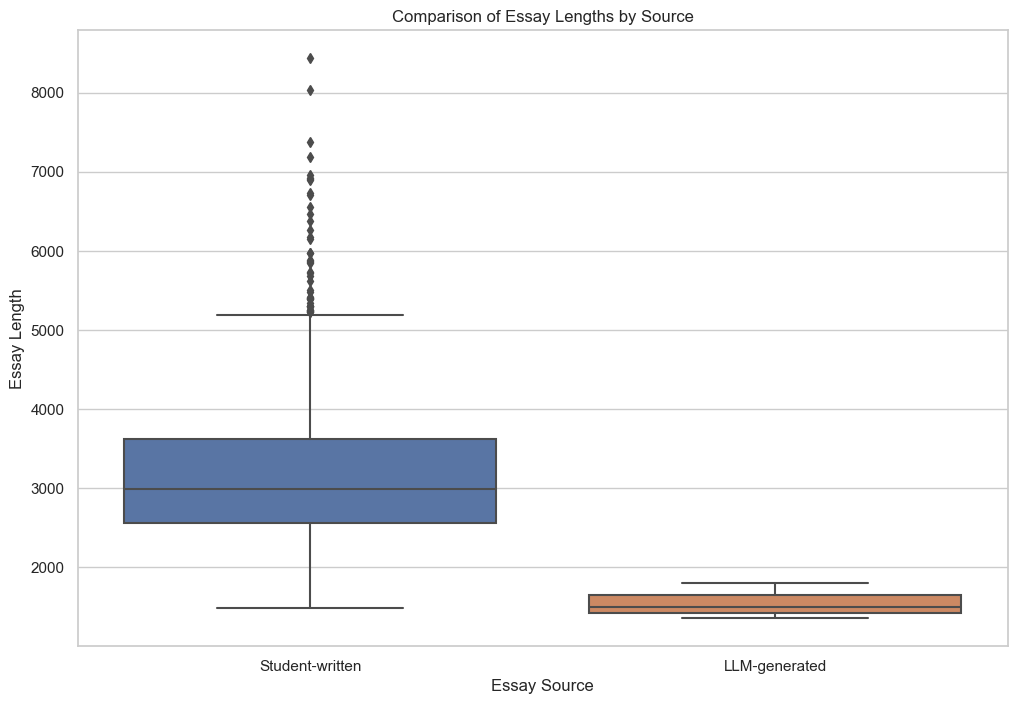

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='generated', y='essay_length', data=train_essays_df)
plt.title('Comparison of Essay Lengths by Source')
plt.xlabel('Essay Source')
plt.ylabel('Essay Length')
plt.xticks([0, 1], ['Student-written', 'LLM-generated'])
plt.show()

Get unique, word count, and avg wod length, and avg sentence count for generated vs student-written essays

In [23]:
def calculate_text_metrics_simple(text):
    words = text.split()
    sentences = text.split('.')
    word_count = len(words)
    unique_word_count = len(set(words))
    sentence_count = len(sentences)
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    return word_count, unique_word_count, sentence_count, avg_word_length

# Apply the function to the 'text' column
train_essays_df['metrics'] = train_essays_df['text'].apply(calculate_text_metrics_simple)

# Expand the 'metrics' column into separate columns
train_essays_df[['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']] = pd.DataFrame(train_essays_df['metrics'].tolist(), index=train_essays_df.index)

# Drop the 'metrics' column as it's no longer needed
train_essays_df.drop('metrics', axis=1, inplace=True)

# Group by 'generated' to compare these metrics between student-written and LLM-generated essays
comparison_metrics = train_essays_df.groupby('generated')[['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']].mean()
comparison_metrics

,word_count,unique_word_count,sentence_count,avg_word_length
generated,,,,
0,556.768727,275.334545,30.063273,4.694868
1,260.666667,146.333333,13.000000,4.935610


Determine most common words for student written essays vs generated essays

/Users/catherineliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


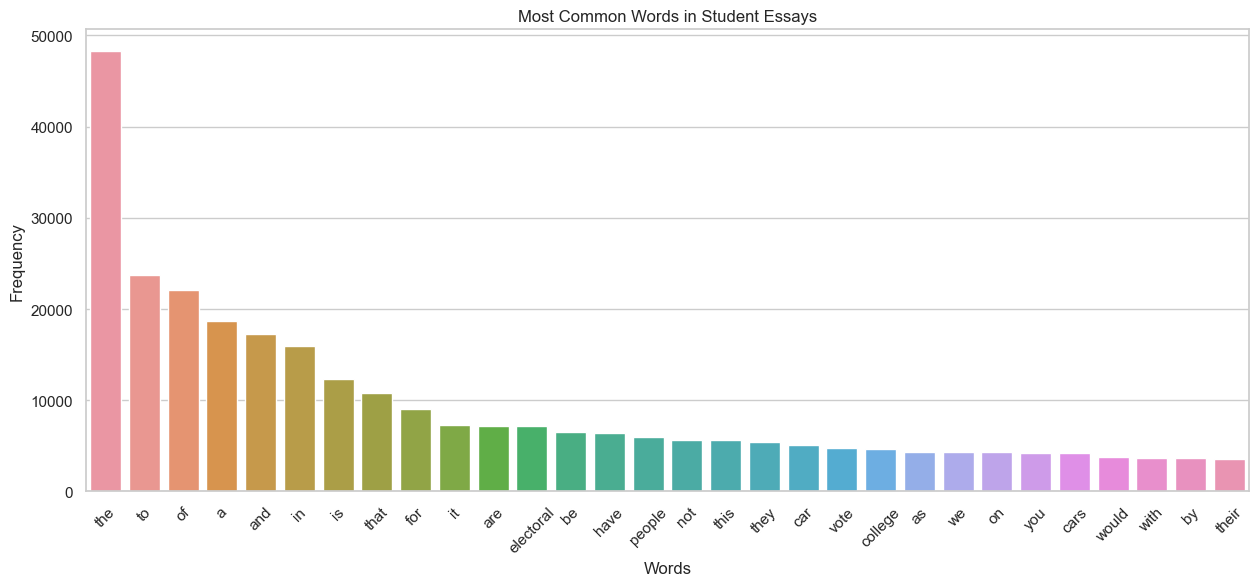

/Users/catherineliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


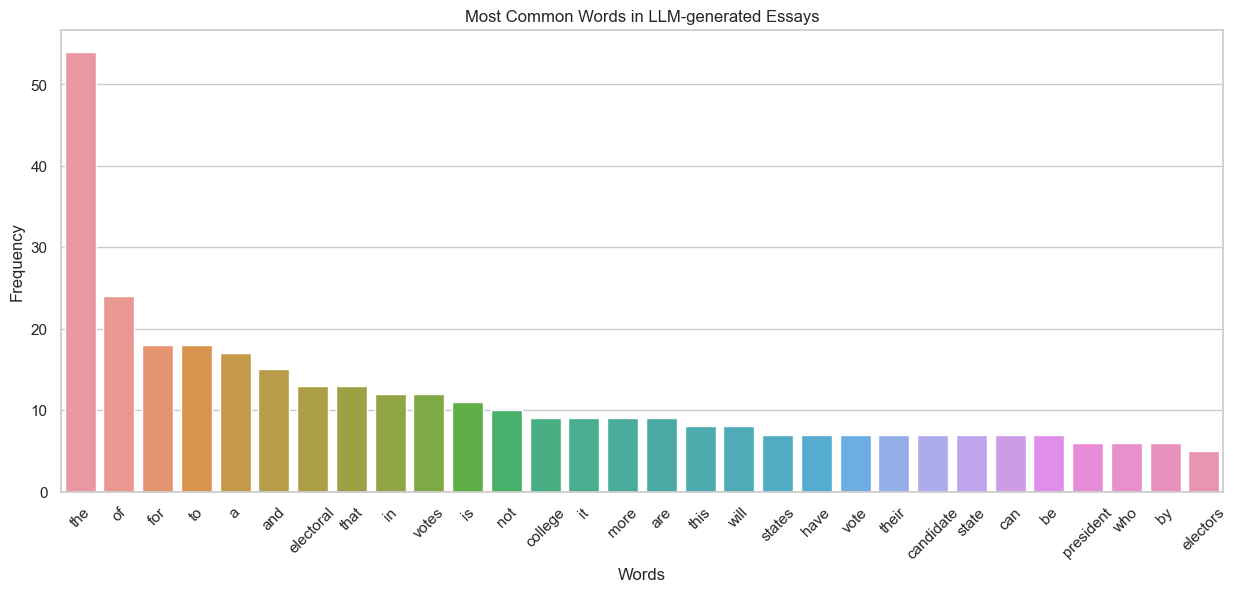

In [24]:
from collections import Counter
import itertools

def plot_most_common_words(text_series, num_words=30, title="Most Common Words"):
    all_text = ' '.join(text_series).lower()
    words = all_text.split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(num_words)
    
    # Plot the most common words
    plt.figure(figsize=(15, 6))
    sns.barplot(x=[word for word, freq in common_words], y=[freq for word, freq in common_words])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

plot_most_common_words(train_essays_df[train_essays_df['generated'] == 0]['text'], title="Most Common Words in Student Essays")
plot_most_common_words(train_essays_df[train_essays_df['generated'] == 1]['text'], title="Most Common Words in LLM-generated Essays")

In [34]:
train_prompts_ex = train_prompts_df.iloc[0]
print(train_prompts_df.columns)

Index(['prompt_id', 'prompt_name', 'instructions', 'source_text'], dtype='object')


In [35]:
# display the content of each column in a structured Markdown format
from IPython.display import display, Markdown

display(Markdown(f"### Prompt Name:\n{train_prompts_ex['prompt_name']}"))
display(Markdown("====="))
display(Markdown(f"### Instructions:\n{train_prompts_ex['instructions']}"))
display(Markdown("====="))
display(Markdown(f"### Source Text:\n (The text of the article(s) the essays were written in response to)"))


### Prompt Name:
Car-free cities

=====

### Instructions:
Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your essay in the space provided.

=====

### Source Text:
 (The text of the article(s) the essays were written in response to)

### Prompt Usage Frequency

prompt_id
0    708
1    670
Name: count, dtype: int64

### Average Essay Length by Prompt

prompt_id
0    3251.927966
1    3081.473134
Name: essay_length, dtype: float64

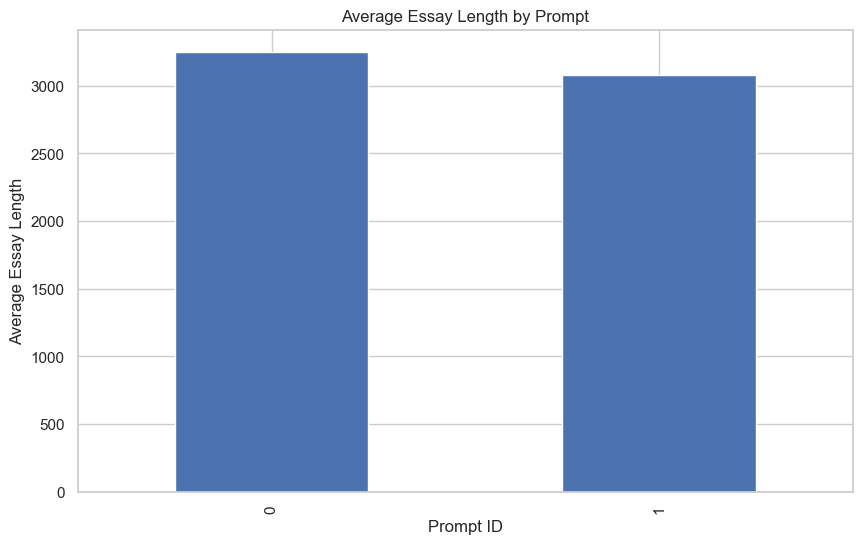

In [36]:
train_essays_df['essay_length'] = train_essays_df['text'].apply(len)

merged_df = train_essays_df.merge(train_prompts_df, on='prompt_id', how='left')

# Analyze prompt frequency
prompt_usage = merged_df['prompt_id'].value_counts()

# Average essay length by prompt
avg_length_by_prompt = merged_df.groupby('prompt_id')['essay_length'].mean()

# Display prompt frequency
display(Markdown("### Prompt Usage Frequency"))
display(prompt_usage)

# Display average essay length by prompt
display(Markdown("### Average Essay Length by Prompt"))
display(avg_length_by_prompt)

# Plot average essay length by prompt
plt.figure(figsize=(10, 6))
avg_length_by_prompt.plot(kind='bar')
plt.title('Average Essay Length by Prompt')
plt.xlabel('Prompt ID')
plt.ylabel('Average Essay Length')
plt.show()


top_words: [('electoral', 44), ('vote', 36), ('electors', 31), ('car', 28), ('college', 27), ('president', 25), ('state', 23), ('election', 21), ('votes', 20), ('cars', 19)]


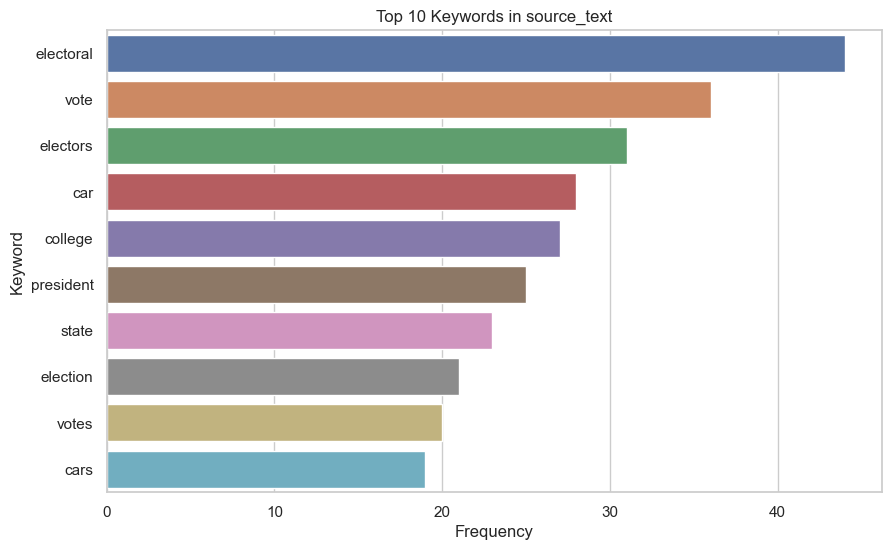


top_words: [('electoral', 7234), ('people', 6924), ('college', 6081), ('vote', 6000), ('car', 5888), ('cars', 5731), ('states', 4132), ('president', 3615), ('votes', 2536), ('electors', 2515)]


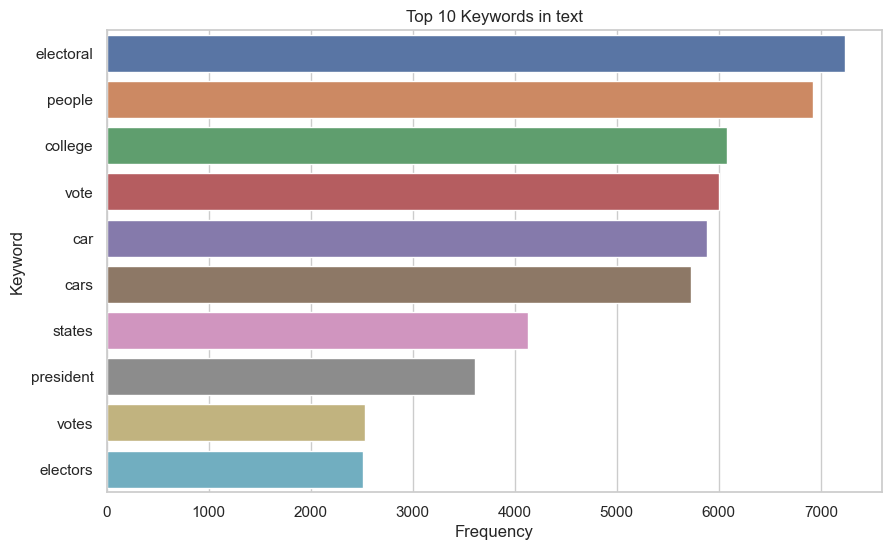

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_keywords(data, column, num_keywords=10):
    vec = CountVectorizer(stop_words='english').fit(data[column])
    bag_of_words = vec.transform(data[column])
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_words = words_freq[:num_keywords]
    print("\ntop_words:", top_words)
    # Convert to DataFrame
    top_df = pd.DataFrame(top_words, columns=['Keyword', 'Frequency'])
    
    # Plot
    plt.figure(figsize=(10,6))
    sns.barplot(x='Frequency', y='Keyword', data=top_df)
    plt.title(f'Top {num_keywords} Keywords in {column}')
    plt.show()

# Plot top keywords for prompts
plot_top_keywords(train_prompts_df, 'source_text')

# Plot top keywords for essays
plot_top_keywords(train_essays_df, 'text')

In [38]:
def get_top_n_grams(corpus, n=None, n_grams=2):
    vec = CountVectorizer(ngram_range=(n_grams, n_grams), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 10 bigrams in the prompts
top_bigrams_prompts = get_top_n_grams(train_prompts_df['source_text'], n=10, n_grams=2)

# Get the top 10 bigrams in the essays
top_bigrams_essays = get_top_n_grams(train_essays_df['text'], n=10, n_grams=2)

# Display the top bigrams in prompts and essays
print("Top 10 Bigrams in Prompts:")
for bigram, freq in top_bigrams_prompts:
    print(f"{bigram}: {freq}")

print("\nTop 10 Bigrams in Essays:")
for bigram, freq in top_bigrams_essays:
    print(f"{bigram}: {freq}")

Top 10 Bigrams in Prompts:
electoral college: 27
electoral votes: 11
popular vote: 9
new york: 8
united states: 7
york times: 6
times company: 6
car free: 5
electoral vote: 5
elisabeth rosenthal: 4

Top 10 Bigrams in Essays:
electoral college: 5794
car usage: 1998
popular vote: 1737
united states: 1179
limiting car: 1158
electoral votes: 689
vote president: 676
air pollution: 535
use cars: 518
greenhouse gas: 448
